Part 1: Data Exploration and Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Deepkiran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Load dataset
df = pd.read_csv("twitter_disaster.csv")
print(df.head())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


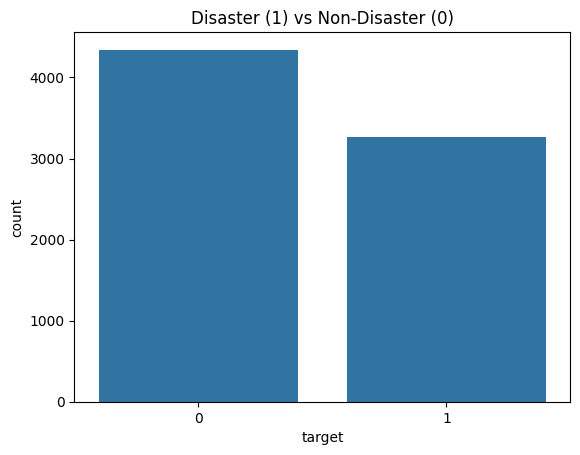

In [3]:
# Visualize class distribution
sns.countplot(x='target', data=df)
plt.title('Disaster (1) vs Non-Disaster (0)')
plt.show()

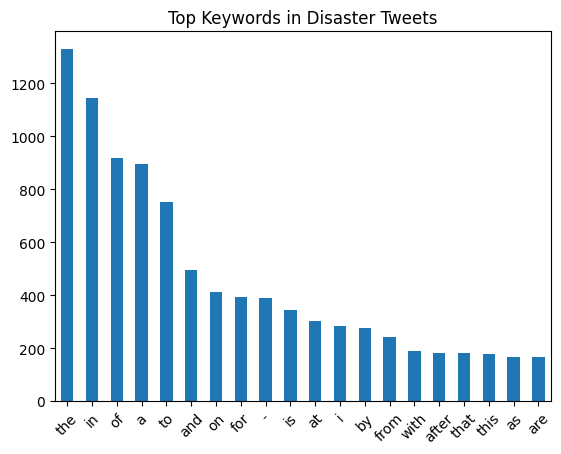

In [4]:
# Keyword frequency in disaster tweets
disaster_tweets = df[df['target'] == 1]['text']
keywords = pd.Series(' '.join(disaster_tweets).lower().split()).value_counts().head(20)
keywords.plot(kind='bar', title='Top Keywords in Disaster Tweets')
plt.xticks(rotation=45)
plt.show()

In [5]:
# Clean text function
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^A-Za-z\s]", "", text)
    text = text.lower()
    text = " ".join([word for word in text.split() if word not in stopwords.words("english")])
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [6]:
# Label encoding (already 0 and 1 in 'target')
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['target'], test_size=0.2, random_state=42)

Part 2: Feature Engineering and Model Selection

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_vec, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Accuracy = {scores.mean():.4f}")


Logistic Regression: Accuracy = 0.8007
Random Forest: Accuracy = 0.7878
Naive Bayes: Accuracy = 0.7979


Part 3: Model Evaluation and Validation

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

# Choose best model (e.g., Logistic Regression)
model = LogisticRegression()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save model and vectorizer
pickle.dump(model, open("model/disaster_model.pkl", "wb"))
pickle.dump(tfidf, open("model/tfidf_vectorizer.pkl", "wb"))


Accuracy: 0.8036769533814839
[[777  97]
 [202 447]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       874
           1       0.82      0.69      0.75       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523



Part 4: Deployment with Web Interface

ststic, tamplates and app.py files contains code for Part 4

for excution of Part 4 please run below command in terminal

python app.py